<a href="https://colab.research.google.com/github/Harsh-murthy/Medical-NER-model-using-Spacy/blob/main/Medical_NER_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical NER Project using SpaCy

This project trains a Named Entity Recognition (NER) model to identify medical entities such as diseases, symptoms, and medications from clinical text using SpaCy.




##Import Necessary Libraries

In [30]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import nltk
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm


Import the Medical Ner Dataset from Kaggle

In [31]:
import os
for dirname , _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/medical-ner/Corona2.json


In [32]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("finalepoch/medical-ner")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/medical-ner


In [33]:
#load the data
data = pd.read_json('/kaggle/input/medical-ner/Corona2.json')

##Profile the data check the contents annotations and entities

In [34]:
data['examples'][0]['content']

"While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]"

In [35]:
data['examples'][0]['annotations'][0]

{'id': '0825a1bf-6a6e-4fa2-be77-8d104701eaed',
 'tag_id': 'c06bd022-6ded-44a5-8d90-f17685bb85a1',
 'end': 371,
 'start': 360,
 'example_id': '18c2f619-f102-452f-ab81-d26f7e283ffe',
 'tag_name': 'Medicine',
 'value': 'Diosmectite',
 'correct': None,
 'human_annotations': [{'timestamp': '2020-03-21T00:24:32.098000Z',
   'annotator_id': 1,
   'tagged_token_id': '0825a1bf-6a6e-4fa2-be77-8d104701eaed',
   'name': 'Ashpat123',
   'reason': 'exploration'}],
 'model_annotations': []}

In [36]:
#Process the data and build the training dataset
training_data = [{'text': example['content'],
                  'entities': [(annotation['start'], annotation['end'], annotation['tag_name'].upper())
                               for annotation in example['annotations']]}
                 for example in data['examples']]

In [37]:
training_data[0]['entities']

[(360, 371, 'MEDICINE'),
 (383, 408, 'MEDICINE'),
 (104, 112, 'MEDICALCONDITION'),
 (679, 689, 'MEDICINE'),
 (6, 23, 'MEDICINE'),
 (25, 37, 'MEDICINE'),
 (461, 470, 'MEDICALCONDITION'),
 (577, 589, 'MEDICINE'),
 (853, 865, 'MEDICALCONDITION'),
 (188, 198, 'MEDICINE'),
 (754, 762, 'MEDICALCONDITION'),
 (870, 880, 'MEDICALCONDITION'),
 (823, 833, 'MEDICINE'),
 (852, 853, 'MEDICALCONDITION'),
 (461, 469, 'MEDICALCONDITION'),
 (535, 543, 'MEDICALCONDITION'),
 (692, 704, 'MEDICINE'),
 (563, 571, 'MEDICALCONDITION')]

In [38]:
training_data[0]['text'][563:571]

'diarrhea'

##Import a blank Spacy model

In [39]:
nlp = spacy.blank("en")
doc_bin = DocBin()

In [40]:
#Convert the data into a doc.bin object and save the training file as train.spacy

from spacy.util import filter_spans

for training_example in tqdm(training_data):
    text = training_example['text']
    labels = training_example['entities']
    doc = nlp.make_doc(text)
    ents = []
    for start, end, label in labels:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)
    filtered_ents = filter_spans(ents)
    doc.set_ents(filtered_ents)
    doc_bin.add(doc)

doc_bin.to_disk("train.spacy")

100%|██████████| 31/31 [00:00<00:00, 448.69it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


###import the base_config file from spacy

https://spacy.io/usage/training
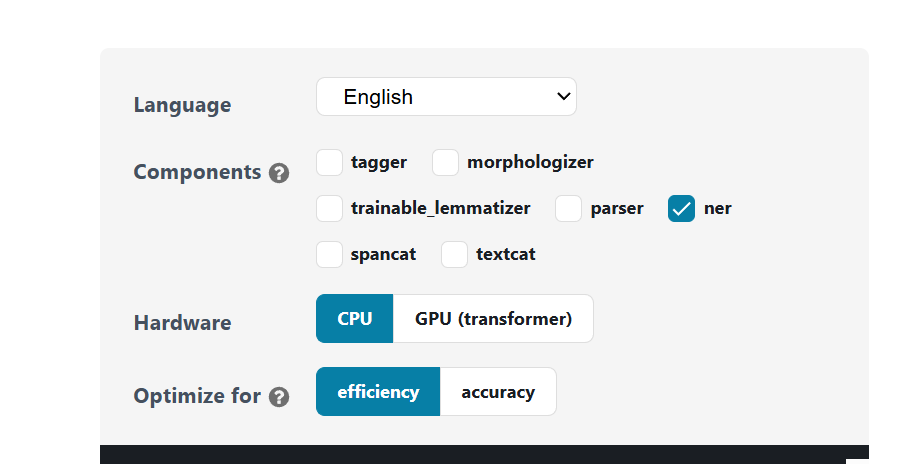

Select the paramenters and fill the config fille using the below command

In [41]:
!python -m spacy init fill-config base_config.cfg config.cfg

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


##Initate the training pipeline

In [44]:
! python -m spacy train config.cfg --output ./ --paths.train ./train.spacy --paths.dev ./train.spacy


ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00    153.29    0.00    0.00    0.00    0.00
  7     200        734.85   3155.29   76.73   79.66   74.02    0.77
 14     400        669.55    734.48   97.24   97.24   97.24    0.97
 22     600        945.17    272.49   98.03   98.03   98.03    0.98
 30     800        188.78    219.05   98.23   98.04   98.43    0.98
 40    1000        224.41    192.51   98.41   99.20   97.64    0.98
 51    1200        206.75    185.68   98.24   97.67   98.82    0.98
 65    1400        142.57    143.77   98.43   98.43   98.43    0.98
 81    1600        132.46    167.75 

##Model Testing

In [46]:
nlp_trained_model = spacy.load("Medical-NER model")

In [47]:


doc = nlp_trained_model('''
The patient was prescribed Aspirin for their heart condition.
The doctor recommended Ibuprofen to alleviate the patient's headache.
The patient is suffering from diabetes, and they need to take Metformin regularly.
After the surgery, the patient experienced some post-operative complications, including infection.
The patient is currently on a regimen of Lisinopril to manage their high blood pressure.
The antibiotic course for treating the bacterial infection should be completed as prescribed.
The patient's insulin dosage needs to be adjusted to better control their blood sugar levels.
The physician suspects that the patient may have pneumonia and has ordered a chest X-ray.
The patient's cholesterol levels are high, and they have been advised to take Atorvastatin.
The allergy to penicillin was noted in the patient's medical history.
''')

In [48]:
spacy.displacy.render(doc, style="ent", jupyter=True)

##The NER model is able to identify entities like different Medical conditions and medicines from th text